# 과적합과 일반화

- **Generalization (일반화)**
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 (훈련데이터에서 테스트데이터로) 일반화 되었다고 말한다. 
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.
- **Overfitting (과대적합)**
    - 모델이 훈련 데이터에 대한 예측성능은 **너무** 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반화 되지 않아 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨져 발생한다.        
- **Underfitting (과소적합)**
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.

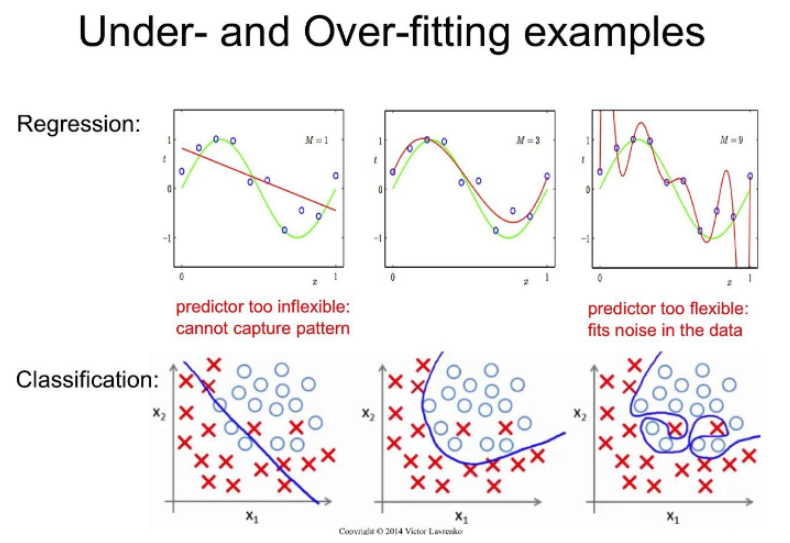  

## Overfitting(과대적합)의 원인
- 학습 데이터 양에 비해 모델이 너무 복잡한 경우 발생.
    - 데이터의 양을 늘린다. 
        - 시간과 돈이 들기 때문에 현실적으로 어렵다.
    - 모델을 좀더 단순하게 만든다.
        - 사용한 모델보다 좀더 단순한 모델을 사용한다.
        - 모든 모델은 모델의 복잡도를 변경할 수 있는 **규제와 관련된 하이퍼파라미터**를 제공하는데 이것을 조절한다.

## Underfitting(과소적합)의 원인
- 데이터 양에 비해서 모델이 너무 단순한 경우 발생
    - 좀더 복잡한 모델을 사용한다.
    - 모델이 제공하는 규제 하이퍼파라미터를 조절한다.

## 규제 하이퍼파라미터란?
- 모델의 복잡도를 규제하는 하이퍼파라미터로 Overfitting이나 Underfitting이 난 경우 이 값을 조정하여 모델이 일반화 되도록 도와준다.
- 이 규제 하이퍼파라미터들은 모든 머신러닝 모델마다 있다.

> ### 하이퍼파라미터란
>- **하이퍼파라미터 (Hyper Parameter)**
>    - 모델의 성능에 영향을 끼치는 파라미터 값으로 모델 생성시 사람이 직접 지정해 주는 값(파라미터)
>- **하이퍼파라미터 튜닝(Hyper Parameter Tunning)**
>    - 모델의 성능을 가장 높일 수 있는 하이퍼 파라미터를 찾는 작업
>- **파라미터(Parameter)**
>    - 머신러닝에서 파라미터는 모델이 데이터 학습을 통해 직접 찾아야 하는 값을 말한다.

### 위스콘신 유방암 데이터셋 모델링

##### 데이터 로딩 및 train/test set 분리

In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=0)

##### 모델 생성 , 학습, 추론
- DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

# 모델생성
# tree = DecisionTreeClassifier(random_state=0)#max_depth=None
# tree = DecisionTreeClassifier(max_depth=1, random_state=0)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

##### 평가

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
print('max depth: None')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))

max depth: None
Train 정확도 :  1.0
Test 정확도 :  0.9020979020979021


In [11]:
print('max depth: 1')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))

max depth: 1
Train 정확도 :  0.9295774647887324
Test 정확도 :  0.8881118881118881


In [14]:
print('max depth: 3')
print("Train 정확도 : ", accuracy_score(y_train, pred_train))
print("Test 정확도 : ", accuracy_score(y_test, pred_test))

max depth: 3
Train 정확도 :  0.9765258215962441
Test 정확도 :  0.916083916083916


- max_depth : None => overfitting
- max_depth : 1 => underfitting
- max_depth : 3  => 일반화

##### 트리 구조 시각화 - graphviz 이용

In [9]:
import pandas as pd
pd.DataFrame(cancer.data, columns=cancer.feature_names).head(10)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

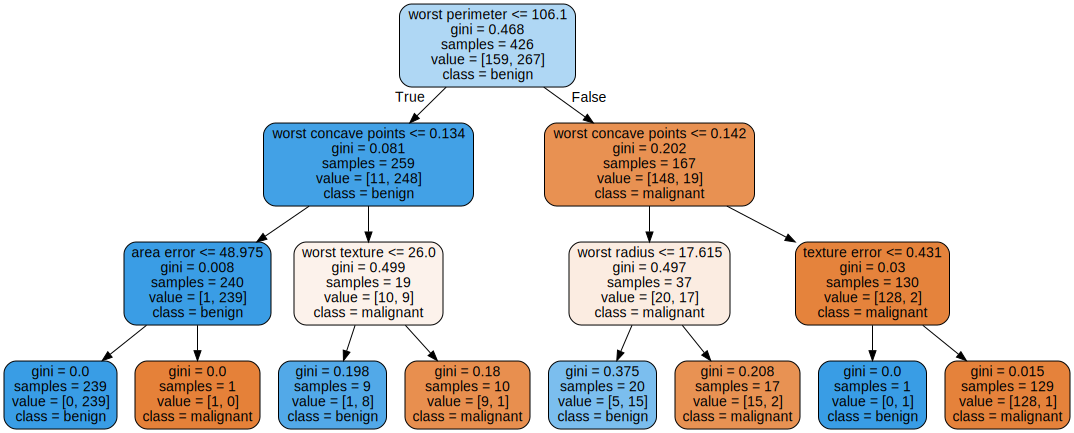

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, #학습한 DT 모델
                               out_file=None, #그래프를 파일로 저장할 경우 파일명.
                               feature_names=cancer.feature_names, # 컬럼명
                               class_names=cancer.target_names, # Label의 클래스명
                               rounded=True, filled=True)) #style
graph

In [2]:
11/259

0.04247104247104247

worst smoothness <= 0.137  #질문
-----이전 노드 질문의 결과-------
gini = 0.5  # 불순도 계산결과
samples = 2 # 현재 노드의 샘플개수
value = [1, 1] #class별 샘플개수
class = malignan #다수 클래스의 label

## Decision Tree 복잡도 제어(규제 파라미터)
- Decision Tree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다. 
    - 노드가 많이 만들어 질수록 훈련데이터셋에 Overfitting 된다.
- 적절한 시점에 트리 생성을 중단해야 한다.

- 모델의 복잡도 관련 주요 하이퍼파라미터
    - **max_depth**: 트리의 최대 깊이
    - **max_leaf_nodes** : 리프노드 개수
    - **min_samples_leaf** : leaf 노드가 되기위한 최소 샘플수 
    - **min_samples_split** : 나누는 최소 샘플수

# 최적의 하이퍼파라미터 찾기

## 최적의 max_depth 찾기

In [24]:
DecisionTreeClassifier?

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
max_depth_candidates = range(1,6)

train_acc_list = []
test_acc_list = []

for depth in max_depth_candidates: #1 ~ 5
    # 모델 생성 + 학습
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    # train/test set으로 추론
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    # 평가 결과를 list에 추가.
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

##### 결과확인

In [21]:
import pandas as pd
result_df = pd.DataFrame({'Train Acc':train_acc_list, 
                          'Test Acc':test_acc_list}, 
                         index=max_depth_candidates
                        )
#DataFrame.rename_axix() : 축의 이름(index/column label)을 지정/변경
result_df.rename_axis(index='Max Depth', columns='dataset', 
                      inplace=True)
result_df

dataset    Train Acc  Test Acc
Max Depth                     
1           0.929577  0.888112
2           0.931925  0.888112
3           0.976526  0.916084
4           0.985915  0.909091
5           1.000000  0.902098

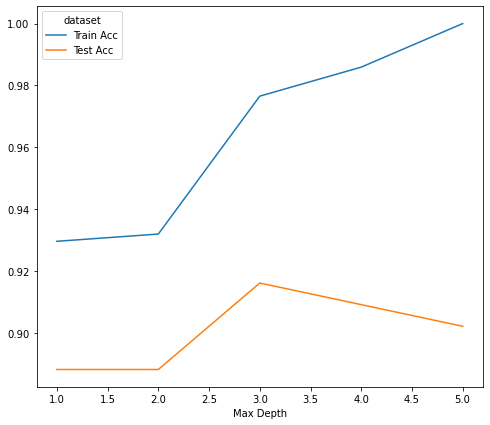

In [23]:
# 단순       복잡
# 1          5

import matplotlib.pyplot as plt
result_df.plot(figsize=(8,7))
plt.show()

# Grid Search 를 이용한 [하이퍼파라미터](#하이퍼파라미터란) 튜닝
- 모델의 성능을 가장 높게 하는 최적의 하이퍼파라미터를 찾는 방법.
- 하이퍼파라미터 후보들을 하나씩 입력해 모델의 성능이 가장 좋게 만드는 값을 찾는다.

## 종류
1. **Grid Search 방식**
    - sklearn.model_selection.**GridSearchCV**
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다.

1. **Random Search 방식**
    - sklearn.model_selection.**RandomizedSearchCV**
        - GridSeach와 동일한 방식으로 사용한다.
        - 모든 조합을 다 시도하지 않고 각 반복마다 임의의 값을 대입해 지정한 횟수만큼만 평가한다.

### [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 매개변수및 결과조회
- **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **params :** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **scoring:** 평가 지표
        - 평가지표문자열: https://scikit-learn.org/stable/modules/model_evaluation.html
        - 생략시 분류는 **accuracy**, 회귀는 **$R^2$** 를 기본 평가지표로 설정한다.
        - 여러개일 경우 List로 묶어서 지정
    - **refit:** best parameter를 정할 때 사용할 평가지표
        - scoring에 여러개의 평가지표를 설정한 경우 refit을 반드시 설정해야 한다.
    - **cv:** 교차검증시 fold 개수. 
    - **n_jobs:** 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

##### 데이터셋 로드 및 train/test set 나누기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

##### GridSearchCV 생성

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

# 파라미터 후보들 - 딕셔너리 (하이퍼파라미터이름:[값 후보])
param_grid = {'max_depth':[None, 1, 2, 3, 4, 5],
              'max_leaf_nodes':[3,5,7,9]
             }

grid_search = GridSearchCV(tree, # 하이퍼파라미터를 찾을 모델
                           param_grid=param_grid, #파라미터 후보
                           scoring='accuracy', #평가지표
                           cv=5, #cross validation의 폴더수
                           n_jobs=-1) #병렬처리시 사용할 cpu개수. -1: 모든 cpu 사용

##### 학습

In [5]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             scoring='accuracy')

##### 결과 확인

In [6]:
grid_search.cv_results_

{'mean_fit_time': array([0.01249719, 0.00312438, 0.00312467, 0.00624804, 0.00937328,
        0.00312433, 0.        , 0.00624828, 0.00312419, 0.00624847,
        0.00312428, 0.00624833, 0.00312405, 0.00624809, 0.00624933,
        0.00624876, 0.00312657, 0.00312657, 0.00624614, 0.00624862,
        0.00312657, 0.00624409, 0.00624914, 0.0031239 ]),
 'std_fit_time': array([0.00624859, 0.00624876, 0.00624933, 0.00765226, 0.00765325,
        0.00624866, 0.        , 0.00765255, 0.00624838, 0.00765279,
        0.00624857, 0.00765261, 0.00624809, 0.00765232, 0.00765384,
        0.00765314, 0.00625315, 0.00625315, 0.00764993, 0.00765297,
        0.00625315, 0.00764741, 0.0076536 , 0.00624781]),
 'mean_score_time': array([0.00312438, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00312428, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00312409, 0.        , 0.        ,
        0.      

In [7]:
import pandas as pd
df = pd.DataFrame(grid_search.cv_results_)#.sort_values('rank_test_score')#.filter(like='rank')
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [8]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012497      0.006249         0.003124        0.006249   
1       0.003124      0.006249         0.000000        0.000000   
2       0.003125      0.006249         0.000000        0.000000   
3       0.006248      0.007652         0.000000        0.000000   
4       0.009373      0.007653         0.000000        0.000000   

  param_max_depth param_max_leaf_nodes  \
0            None                    3   
1            None                    5   
2            None                    7   
3            None                    9   
4               1                    3   

                                     params  split0_test_score  \
0  {'max_depth': None, 'max_leaf_nodes': 3}           0.918605   
1  {'max_depth': None, 'max_leaf_nodes': 5}           0.941860   
2  {'max_depth': None, 'max_leaf_nodes': 7}           0.941860   
3  {'max_depth': None, 'max_leaf_nodes': 9}           0.941860   
4     {'max_depth': 1, 'max_leaf_nodes': 3}           0.860465   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.929412           0.870588           0.917647           0.952941   
1           0.964706           0.905882           0.929412           0.941176   
2           0.976471           0.894118           0.941176           0.964706   
3           0.976471           0.882353           0.929412           0.952941   
4           0.929412           0.882353           0.894118           0.917647   

   mean_test_score  std_test_score  rank_test_score  
0         0.917839        0.026830               16  
1         0.936607        0.019151                4  
2         0.943666        0.028225                1  
3         0.936607        0.031237                4  
4         0.896799        0.024634               21

In [9]:
# 앞 5개 컬럼은 제외하고 조회
df[df.columns[6:]].sort_values('rank_test_score').head()

params  split0_test_score  \
2   {'max_depth': None, 'max_leaf_nodes': 7}            0.94186   
18     {'max_depth': 4, 'max_leaf_nodes': 7}            0.94186   
22     {'max_depth': 5, 'max_leaf_nodes': 7}            0.94186   
23     {'max_depth': 5, 'max_leaf_nodes': 9}            0.94186   
1   {'max_depth': None, 'max_leaf_nodes': 5}            0.94186   

    split1_test_score  split2_test_score  split3_test_score  \
2            0.976471           0.894118           0.941176   
18           0.976471           0.894118           0.941176   
22           0.976471           0.894118           0.941176   
23           0.976471           0.882353           0.929412   
1            0.964706           0.905882           0.929412   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
2            0.964706         0.943666        0.028225                1  
18           0.964706         0.943666        0.028225                1  
22           0.964706         0.943666        0.028225                1  
23           0.952941         0.936607        0.031237                4  
1            0.941176         0.936607        0.019151                4

In [10]:
print("가장 좋은 평가점수: ",grid_search.best_score_)

가장 좋은 평가점수:  0.9436662106703146


In [11]:
print("가장 좋은 파라미터 조합:",grid_search.best_params_)

가장 좋은 파라미터 조합: {'max_depth': None, 'max_leaf_nodes': 7}


##### best model을 이용해 Test set 최종평가

In [12]:
best_model = grid_search.best_estimator_ #best parameter로 학습한 모델을 반환.
best_model

DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)

In [14]:
# test set으로 최종평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, best_model.predict(X_test))

0.9370629370629371

In [15]:
#gridsearch객체.predict() => best_estimator_를 이용해서 predict한 결과를 반환
accuracy_score(y_test, grid_search.predict(X_test))

0.9370629370629371

##### 여러 성능지표를 확인
- 여러 성능지표는 확인할 수 있지만 최적의 파라미터를 찾기 위해서는 하나의 지표만 사용한다. 
    - scoring에 리스트로 평가지표들 묶어서 설정
    - refit에 최적의 파라미터 찾기 위한 평가지표 설정

##### GridSearchCV 생성

In [26]:
tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[None, 1, 2, 3, 4, 5],
              'max_leaf_nodes':[3,5,7,9]
             }
grid_search = GridSearchCV(tree, 
                           param_grid=param_grid,
                           scoring=['accuracy', 'recall', 'precision','roc_auc', 'f1'], 
#                            refit='accuracy', 
                           refit='recall',
                           cv=5, 
                           n_jobs=-1)
# refit:  best parameter를 선택할 평가지표 설정. 
#        여기서 지정한 평가지표가 가장 좋은 파라미터로 모델을 재학습시킨다.

##### 학습

In [27]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 5, 7, 9]},
             refit='recall',
             scoring=['accuracy', 'recall', 'precision', 'roc_auc', 'f1'])

##### 결과확인

In [28]:
df2 = pd.DataFrame(grid_search.cv_results_)
df2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall',
       'split1_test_recall', 'split2_test_recall', 'split3_test_recall',
       'split4_test_recall', 'mean_test_recall', 'std_test_recall',
       'rank_test_recall', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_roc_auc', 'split1_test_roc_auc',
       'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc',
       'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', '

In [29]:
df2[df2.columns[6:]].sort_values('rank_test_recall').head()

params  split0_test_accuracy  \
2   {'max_depth': None, 'max_leaf_nodes': 7}               0.94186   
18     {'max_depth': 4, 'max_leaf_nodes': 7}               0.94186   
22     {'max_depth': 5, 'max_leaf_nodes': 7}               0.94186   
14     {'max_depth': 3, 'max_leaf_nodes': 7}               0.94186   
1   {'max_depth': None, 'max_leaf_nodes': 5}               0.94186   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
2               0.976471              0.894118              0.941176   
18              0.976471              0.894118              0.941176   
22              0.976471              0.894118              0.941176   
14              0.964706              0.894118              0.894118   
1               0.964706              0.905882              0.929412   

    split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
2               0.964706            0.943666           0.028225   
18              0.964706            0.943666           0.028225   
22              0.964706            0.943666           0.028225   
14              0.964706            0.931902           0.031958   
1               0.941176            0.936607           0.019151   

    rank_test_accuracy  split0_test_recall  ...  std_test_roc_auc  \
2                    1            0.962963  ...          0.034893   
18                   1            0.962963  ...          0.034893   
22                   1            0.962963  ...          0.034893   
14                  11            0.962963  ...          0.035803   
1                    4            0.962963  ...          0.024735   

    rank_test_roc_auc  split0_test_f1  split1_test_f1  split2_test_f1  \
2                   4        0.954128        0.981481        0.915888   
18                  4        0.954128        0.981481        0.915888   
22                  4        0.954128        0.981481        0.915888   
14                  7        0.954128        0.971963        0.915888   
1                   9        0.954128        0.971963        0.924528   

    split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  
2         0.953271        0.971429      0.955239     0.022380             1  
18        0.953271        0.971429      0.955239     0.022380             1  
22        0.953271        0.971429      0.955239     0.022380             1  
14        0.918919        0.971429      0.946465     0.024600            10  
1         0.943396        0.953271      0.949457     0.015499             6  

[5 rows x 41 columns]

In [30]:
# refit 에서 설정한 평가지표(accuracy)
grid_search.best_score_

0.9587002096436059

In [31]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 7}

##### best model을 이용해 Test set 최종평가

In [35]:
# refit 평가지표가 가장좋은 파라미터로 재학습한 모델
from sklearn.metrics import recall_score
best_model = grid_search.best_estimator_ 
accuracy_score(y_test, best_model.predict(X_test)), recall_score(y_test, best_model.predict(X_test))

(0.9370629370629371, 0.9444444444444444)

In [25]:
accuracy_score(y_test, grid_search.predict(X_test)) 

0.9370629370629371

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- **Initializer 매개변수**
    - **estimator:** 모델객체 지정
    - **param_distributions:** 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **<font color='red'>n_iter</font>:** 파라미터 검색 횟수
    - **scoring:** 평가 지표
    - **refit:** best parameter를 정할 때 사용할 평가지표. Scoring에 여러개의 평가지표를 설정한 경우 설정.
    - **cv:** 교차검증시 fold 개수. 
    - **n_jobs:** 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)

- **메소드**
    - **fit(X, y):** 학습
    - **predict(X):** 분류-추론한 class. 회귀-추론한 값
        - 제일 좋은 성능을 낸 모델로 predict()
    - **predict_proba(X):** 분류문제에서 class별 확률을 반환
        - 제일 좋은 성능을 낸 모델로 predict_proba() 호출

- **결과 조회 속성**
    - fit() 후에 호출 할 수 있다.
    - **cv_results_:** 파라미터 조합별 평가 결과를 Dictionary로 반환한다.
    - **best_params_:** 가장 좋은 성능을 낸 parameter 조합을 반환한다.
    - **best_estimator_:** 가장 좋은 성능을 낸 모델을 반환한다.
    - **best_score_:** 가장 좋은 점수 반환한다.

##### 데이터셋 로드 및 train/test set 나누기

In [36]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

##### RandomizedSearchCV 생성

In [37]:
10 * 10 * 2

200

In [47]:
tree = DecisionTreeClassifier(random_state=0)
param_grid = {
    "max_depth":range(1,11),
    "max_leaf_nodes":range(3,31,3),
    "criterion":["gini", "entropy"]
}

n_iter_search = 50 
random_search = RandomizedSearchCV(tree, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search, 
                                   cv=4,
                                   n_jobs=-1)
# scoring생략 - 분류: accuracy, 회귀: r2

##### 학습

In [48]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'max_leaf_nodes': range(3, 31, 3)})

##### 결과확인

In [49]:
# 전체 결과 확인
result_dict = random_search.cv_results_
result_dict

{'mean_fit_time': array([0.00124711, 0.00174624, 0.00174445, 0.00149649, 0.00124699,
        0.00099736, 0.00174624, 0.00149661, 0.00099713, 0.00174981,
        0.00149614, 0.00124228, 0.00124794, 0.0012483 , 0.0014962 ,
        0.00349057, 0.00099754, 0.00224555, 0.00099742, 0.00149626,
        0.00124794, 0.00099581, 0.00324094, 0.00124604, 0.00125092,
        0.00099981, 0.00125098, 0.00099981, 0.00149482, 0.00100082,
        0.00124729, 0.00099719, 0.00124633, 0.00124693, 0.0014962 ,
        0.00199443, 0.00149649, 0.00149548, 0.00124645, 0.00124693,
        0.00124693, 0.00099766, 0.00124675, 0.00099754, 0.00099784,
        0.00224435, 0.00124621, 0.00150079, 0.00149578, 0.00174469]),
 'std_fit_time': array([4.31983523e-04, 4.31985464e-04, 4.31920653e-04, 4.99189192e-04,
        4.32327486e-04, 1.41427642e-06, 4.32535572e-04, 4.99428777e-04,
        3.09714819e-07, 4.34106299e-04, 4.98950802e-04, 4.34132982e-04,
        4.30818295e-04, 4.31575542e-04, 8.63691541e-04, 3.76486982e-0

In [50]:
result_df = pd.DataFrame(result_dict)
print(result_df.shape)
result_df.head()

(50, 15)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001247      0.000432         0.000748        0.000432   
1       0.001746      0.000432         0.000747        0.000431   
2       0.001744      0.000432         0.000499        0.000499   
3       0.001496      0.000499         0.000498        0.000498   
4       0.001247      0.000432         0.000499        0.000499   

  param_max_leaf_nodes param_max_depth param_criterion  \
0                   12               8         entropy   
1                   21               4         entropy   
2                   30               4         entropy   
3                   27               3         entropy   
4                   30               4            gini   

                                              params  split0_test_score  \
0  {'max_leaf_nodes': 12, 'max_depth': 8, 'criter...           0.964286   
1  {'max_leaf_nodes': 21, 'max_depth': 4, 'criter...           0.964286   
2  {'max_leaf_nodes': 30, 'max_depth': 4, 'criter...           0.964286   
3  {'max_leaf_nodes': 27, 'max_depth': 3, 'criter...           0.964286   
4  {'max_leaf_nodes': 30, 'max_depth': 4, 'criter...           0.964286   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.928571                1.0           0.928571         0.955357   
1           0.928571                1.0           0.928571         0.955357   
2           0.928571                1.0           0.928571         0.955357   
3           0.928571                1.0           0.964286         0.964286   
4           0.964286                1.0           0.928571         0.964286   

   std_test_score  rank_test_score  
0        0.029613               26  
1        0.029613               26  
2        0.029613               26  
3        0.025254               22  
4        0.025254                1

In [52]:
result_df[result_df.columns[6:]].sort_values('rank_test_score')

param_criterion                                             params  \
20            gini  {'max_leaf_nodes': 27, 'max_depth': 8, 'criter...   
36            gini  {'max_leaf_nodes': 24, 'max_depth': 5, 'criter...   
35            gini  {'max_leaf_nodes': 21, 'max_depth': 5, 'criter...   
34            gini  {'max_leaf_nodes': 6, 'max_depth': 5, 'criteri...   
42            gini  {'max_leaf_nodes': 24, 'max_depth': 8, 'criter...   
44            gini  {'max_leaf_nodes': 12, 'max_depth': 4, 'criter...   
29            gini  {'max_leaf_nodes': 9, 'max_depth': 9, 'criteri...   
26            gini  {'max_leaf_nodes': 6, 'max_depth': 6, 'criteri...   
45            gini  {'max_leaf_nodes': 30, 'max_depth': 10, 'crite...   
23            gini  {'max_leaf_nodes': 18, 'max_depth': 6, 'criter...   
21            gini  {'max_leaf_nodes': 24, 'max_depth': 9, 'criter...   
39            gini  {'max_leaf_nodes': 21, 'max_depth': 4, 'criter...   
19            gini  {'max_leaf_nodes': 15, 'max_depth': 5, 'criter...   
18            gini  {'max_leaf_nodes': 12, 'max_depth': 8, 'criter...   
16            gini  {'max_leaf_nodes': 18, 'max_depth': 4, 'criter...   
40            gini  {'max_leaf_nodes': 12, 'max_depth': 10, 'crite...   
11            gini  {'max_leaf_nodes': 15, 'max_depth': 8, 'criter...   
9             gini  {'max_leaf_nodes': 15, 'max_depth': 9, 'criter...   
8             gini  {'max_leaf_nodes': 18, 'max_depth': 10, 'crite...   
46            gini  {'max_leaf_nodes': 21, 'max_depth': 9, 'criter...   
4             gini  {'max_leaf_nodes': 30, 'max_depth': 4, 'criter...   
12         entropy  {'max_leaf_nodes': 12, 'max_depth': 3, 'criter...   
10            gini  {'max_leaf_nodes': 30, 'max_depth': 3, 'criter...   
3          entropy  {'max_leaf_nodes': 27, 'max_depth': 3, 'criter...   
15            gini  {'max_leaf_nodes': 18, 'max_depth': 3, 'criter...   
14         entropy  {'max_leaf_nodes': 9, 'max_depth': 8, 'criteri...   
41         entropy  {'max_leaf_nodes': 21, 'max_depth': 5, 'criter...   
37         entropy  {'max_leaf_nodes': 24, 'max_depth': 8, 'criter...   
1          entropy  {'max_leaf_nodes': 21, 'max_depth': 4, 'criter...   
2          entropy  {'max_leaf_nodes': 30, 'max_depth': 4, 'criter...   
32         entropy  {'max_leaf_nodes': 30, 'max_depth': 9, 'criter...   
28         entropy  {'max_leaf_nodes': 9, 'max_depth': 7, 'criteri...   
5          entropy  {'max_leaf_nodes': 24, 'max_depth': 9, 'criter...   
27         entropy  {'max_leaf_nodes': 27, 'max_depth': 8, 'criter...   
25         entropy  {'max_leaf_nodes': 18, 'max_depth': 9, 'criter...   
22         entropy  {'max_leaf_nodes': 27, 'max_depth': 10, 'crite...   
13         entropy  {'max_leaf_nodes': 21, 'max_depth': 8, 'criter...   
17         entropy  {'max_leaf_nodes': 6, 'max_depth': 7, 'criteri...   
31         entropy  {'max_leaf_nodes': 24, 'max_depth': 6, 'criter...   
0          entropy  {'max_leaf_nodes': 12, 'max_depth': 8, 'criter...   
47            gini  {'max_leaf_nodes': 3, 'max_depth': 4, 'criteri...   
24            gini  {'max_leaf_nodes': 3, 'max_depth': 8, 'criteri...   
33         entropy  {'max_leaf_nodes': 9, 'max_depth': 2, 'criteri...   
30         entropy  {'max_leaf_nodes': 3, 'max_depth': 9, 'criteri...   
48            gini  {'max_leaf_nodes': 3, 'max_depth': 2, 'criteri...   
7             gini  {'max_leaf_nodes': 6, 'max_depth': 2, 'criteri...   
6             gini  {'max_leaf_nodes': 27, 'max_depth': 2, 'criter...   
38         entropy  {'max_leaf_nodes': 12, 'max_depth': 2, 'criter...   
49         entropy  {'max_leaf_nodes': 3, 'max_depth': 4, 'criteri...   
43         entropy  {'max_leaf_nodes': 24, 'max_depth': 1, 'criter...   

    split0_test_score  split1_test_score  split2_test_score  \
20           0.964286           0.964286           1.000000   
36           0.964286           0.964286           1.000000   
35           0.964286           0.964286           1.000000   
34           0.964286      

In [53]:
random_search.best_score_

0.9642857142857144

In [54]:
random_search.best_params_

{'max_leaf_nodes': 30, 'max_depth': 4, 'criterion': 'gini'}

##### best model을 이용해 Test set 최종평가

In [55]:
bset_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)

In [56]:
accuracy_score(y_test, bset_model.predict(X_test))

0.9210526315789473

In [57]:
accuracy_score(y_test, random_search.predict(X_test))

0.9210526315789473

In [58]:
def process1(X):
    return X * 2

def process2(X):
    return X**3

def process3(X):
    return X/3

In [66]:
def pipeline_process(X):
    y1 = process1(X)
    y2 = process2(y1)
    result = process3(y2)
    return result

In [68]:
pipeline_process(30)

72000.0

# 파이프라인 (Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습) 처리 과정을 설정하여 한번에 처리되도록 한다.
- 파이프라인은 여러개의 변환기와 마지막에 변환기 또는 추정기를 넣을 수 있다. (추정기-Estimator는 마지막에만 올 수 있다.)
- 전처리 작업 파이프라인
    - 변환기들로만 구성
- 전체 프로세스 파이프 라인
    - 마지막에 추정기를 넣는다

## Pipeline 생성
- (이름, 변환기) 를 리스트로 묶어서 전달한다.
- 마지막에는 추정기가 올 수있다.

## Pipeline 을 이용한 학습
- pipeline.fit() 
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달된다. 마지막 단계에서는 fit()만 호출한다.
    - 마지막이 추정기일때 사용
- pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행된다.
    - 전처리 작업 파이프라인(모든 단계가 변환기)일 때  사용
- 마지막이 추정기(모델) 일 경우
    - predict(X), predict_proba(X)
    - 추정기를 이용해서 X에 대한 결과를 추론
    - 모델 앞에 있는 변환기들을 이용해서 transform() 그 처리결과를 다음 단계로 전달

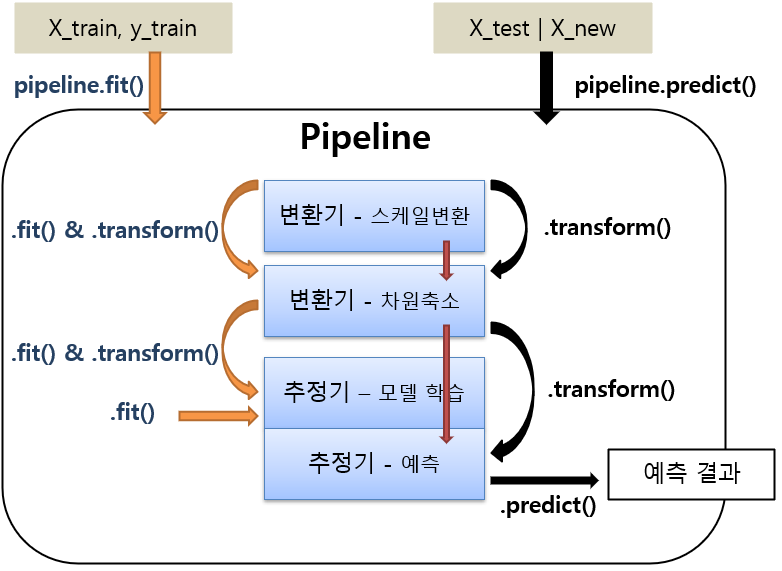

##### 데이터셋 로드, train/test set 분리

In [69]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

X, y = load_breast_cancer(return_X_y=True)

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=cancer.target, random_state=0)

##### Pipeline 생성

In [70]:
# 순서대로 pipeline 구성 : Feature scaling => SVC 로 학습/추론
# 각 프로세스 등록 ("이름", 객체)
order = [
    ('scaler', StandardScaler()),
    ('svm',SVC())
]
pipeline = Pipeline(order, verbose=True) #verbose=True : 어떤 단계를 처리하는지 로그를 남긴다.
print(pipeline.steps)

[('scaler', StandardScaler()), ('svm', SVC())]


##### 학습

In [72]:
pipeline.fit(X_train, y_train) #  등록된 process들을 모두 학습 
# X_train_scaled = scaler.fit_transform(X_train)
# svm.fit(X_train_scaled, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())], verbose=True)

##### 추론 및 평가

In [74]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

# X_test_scaled = scaler.transform(X_test)
# pred_test = svm.predict(X_test_scaled)

In [75]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9929577464788732, 0.958041958041958)

##### 새로운 데이터에 대한 추론

In [76]:
new_data = X_test[:3]
new_data.shape

(3, 30)

In [77]:
pipeline.predict(new_data) 

array([1, 0, 0])

## GridSearch에서 Pipeline 사용
- 하이퍼파라미터 지정시 파이프라인 `프로세스이름__하이퍼파라미터` 형식으로 지정한다.
1. Pipeline 생성
2. GridSearchCV의 estimator에 pipeline 등록

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

##### Pipeline 생성

In [80]:
order = [
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=0))
]
pipeline = Pipeline(order)

##### GridSearchCV 생성
- model에 Pipeline을 설정한다.

In [81]:
param = {
    "svc__C":[0.001, 0.01, 0.1, 1, 10],
    "svc__gamma":[0.001, 0.01, 0.1, 1, 10]
}
gs = GridSearchCV(pipeline, 
                  param, 
                  scoring='accuracy', 
                  cv=4, 
                  n_jobs=-1)

##### 학습

In [82]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

##### 결과확인

In [83]:
print(gs.best_params_)
print(gs.best_score_)

{'svc__C': 10, 'svc__gamma': 0.01}
0.9812643272791395


In [84]:
df = pd.DataFrame(gs.cv_results_)
df[df.columns[6:]].sort_values('rank_test_score')

params  split0_test_score  \
21      {'svc__C': 10, 'svc__gamma': 0.01}           0.971963   
20     {'svc__C': 10, 'svc__gamma': 0.001}           0.953271   
17        {'svc__C': 1, 'svc__gamma': 0.1}           0.953271   
16       {'svc__C': 1, 'svc__gamma': 0.01}           0.934579   
22       {'svc__C': 10, 'svc__gamma': 0.1}           0.953271   
15      {'svc__C': 1, 'svc__gamma': 0.001}           0.897196   
11     {'svc__C': 0.1, 'svc__gamma': 0.01}           0.906542   
12      {'svc__C': 0.1, 'svc__gamma': 0.1}           0.869159   
10    {'svc__C': 0.1, 'svc__gamma': 0.001}           0.663551   
23         {'svc__C': 10, 'svc__gamma': 1}           0.635514   
19         {'svc__C': 1, 'svc__gamma': 10}           0.626168   
18          {'svc__C': 1, 'svc__gamma': 1}           0.626168   
14       {'svc__C': 0.1, 'svc__gamma': 10}           0.626168   
0   {'svc__C': 0.001, 'svc__gamma': 0.001}           0.626168   
9       {'svc__C': 0.01, 'svc__gamma': 10}           0.626168   
8        {'svc__C': 0.01, 'svc__gamma': 1}           0.626168   
7      {'svc__C': 0.01, 'svc__gamma': 0.1}           0.626168   
6     {'svc__C': 0.01, 'svc__gamma': 0.01}           0.626168   
5    {'svc__C': 0.01, 'svc__gamma': 0.001}           0.626168   
4      {'svc__C': 0.001, 'svc__gamma': 10}           0.626168   
3       {'svc__C': 0.001, 'svc__gamma': 1}           0.626168   
2     {'svc__C': 0.001, 'svc__gamma': 0.1}           0.626168   
1    {'svc__C': 0.001, 'svc__gamma': 0.01}           0.626168   
13        {'svc__C': 0.1, 'svc__gamma': 1}           0.626168   
24        {'svc__C': 10, 'svc__gamma': 10}           0.626168   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
21           0.971963           0.990566           0.990566         0.981264   
20           0.962617           0.990566           0.981132         0.971896   
17           0.934579           0.981132           0.990566         0.964887   
16           0.962617           0.990566           0.971698         0.964865   
22           0.934579           0.971698           0.981132         0.960170   
15           0.953271           0.952830           0.971698         0.943749   
11           0.953271           0.943396           0.971698         0.943727   
12           0.934579           0.962264           0.943396         0.927350   
10           0.719626           0.698113           0.688679         0.692493   
23           0.626168           0.632075           0.622642         0.629100   
19           0.626168           0.632075           0.622642         0.626763   
18           0.626168           0.632075           0.622642         0.626763   
14           0.626168           0.632075           0.622642         0.626763   
0            0.626168           0.632075           0.622642         0.626763   
9            0.626168           0.632075           0.622642         0.626763   
8            0.626168           0.632075           0.622642         0.626763   
7            0.626168           0.632075           0.622642         0.626763   
6            0.626168           0.632075           0.622642         0.626763   
5            0.626168           0.632075           0.622642         0.626763   
4            0.626168           0.632075           0.622642         0.626763   
3            0.626168           0.632075           0.622642         0.626763   
2            0.626168           0.632075           0.622642         0.626763   
1            0.626168           0.632075           0.622642         0.626763   
13           0.626168           0.632075           0.622642         0.626763   
24           0.626168           0.632075           0.622642         0.626763   

    std_test_score  rank_test_score  
21        0.009302                1  
20        0.014721                2  
17        0.022231                3  
16        0.020184                4  
22        0.017852                5  
15        0.027935                6 

## make_pipeline() 함수를 이용한 파이프라인 생성을 편리하게 하기
- make_pipeline(변환기객체, 변환기객체, ....., 추정기객체): Pipeline 
- 프로세스의 이름을 프로세스클래스이름(소문자로변환)으로 해서 Pipeline을 생성.

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
pipeline2 = make_pipeline(MinMaxScaler(), SVC(C=100))

print(pipeline2.steps)
print(type(pipeline2))

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]
<class 'sklearn.pipeline.Pipeline'>


In [86]:
pipeline2.fit(X_train, y_train).score(X_test, y_test)

0.951048951048951